# Simple Genetic Algorithm
This notebook contains a genetic algorithm trying to reach a sentence (optimum DNA) from random strings over generations with help of mating, crossover and mutation.

# Outline of notebook
#### 1 - Initialize 
	- Start N random DNA’ed sentences with fixed length
#### 2 - Selection
	- Calculate fitness for each sentences
	- Create mating pool wrt fitness scores
#### 3 - Reproduce
	- Select 2 parents
    - Crossover
    - Mutation
    - Add new child to population
#### 4 - Replace (main part)
    - Replace old population with new
	- Return to step 2 (N times).
#### 5 - Plots
    - Some plots to see progress over generations

## 1 - Initialize
    - N random sentences are created with fixed length of given sentence.
    - Only lowercase letters and space.

In [1]:
from matplotlib import pyplot as plt
from random import randint
from numpy.random import choice
import random, string
from numpy import mean
import time
import numpy as np

#all_chars = string.ascii_uppercase + string.ascii_lowercase + string.digits + " "
all_chars = string.ascii_lowercase + " "

In [2]:
def generate_random_sentence(fix_len,all_chars):
    return ''.join(random.choice(all_chars) for _ in range(fix_len))

def initialize(real_sentence,N):
    fix_len = len(real_sentence)
    population = []
    
    for i in range(N):
        sentence = generate_random_sentence(fix_len,all_chars)
        population.append(sentence)
    return population

# 2 - Selection

- Calculate fitness
- Create mating pool wrt fitness scores.

In [3]:
def fitness(sen1, sen2):
    if len(sen1) != len(sen2):
        print("Error, length of sentences must be the same.\nSentence 1: " + sen1 +"\nSentence 2: " + sen2)
        return 0,0
    score = 0
    for ind,elem in enumerate(sen1):
        if sen2[ind] == elem:
            score += 1
    percentage_score = 1.0*score/len(sen1)
    return score, percentage_score

In [4]:
fitness("ahmet", 'ahmak')

(3, 0.6)

In [5]:
def selection(population,real_sentence):
    current_total_score = 0
    list_of_scores = []

    for sentence in population:
        score, percentage_score = fitness(real_sentence,sentence)
        current_total_score += score
        list_of_scores.append(score)

    prob_dist = [x / current_total_score for x in list_of_scores]
    return list_of_scores, prob_dist

# 3 - Reproduce N times
    - Pick 2 parents
    - Crossover
    - Mutation
    - Add new child to new population

In [6]:
def crossover(sen1,sen2):
    pos = int(random.random()*len(sen1))
    return sen1[:pos]+sen2[pos:]

def mutation(sentence, percentage):
    for ind,elem in enumerate(sentence):
        rand = randint(1,10000)
        if rand<=percentage*100:
            rand_char = ''.join(random.choice(all_chars))
            sentence = sentence[:ind] + rand_char[0] + sentence[ind+1:]
    return sentence

In [7]:
def reproduce(population,real_sentence,mutation_percentage=1):
    
    avg_generation_score = mean(list_of_scores)
    new_population = []
    # All draws at once for efficiency
    draw = choice(population, 2*N, p=prob_dist)
    
    for i in range(N):
        child = crossover(draw[2*i],draw[2*i+1])
        child = mutation(child,mutation_percentage)
        new_population.append(child)
    
    return avg_generation_score, new_population

In [8]:
def sort_together(list1,list2):
    list1, list2 = zip(*sorted(zip(list1, list2),reverse=True))
    return list1,list2

# 4 - Replace (main part)
    This is the main part of the algorithm where all methods are called.
    - Initialize
    - Selection
    - Reproduction
    - Replace for the next generation
    - Go to "selection" part

In [41]:
t_start = time.time()

# Number of generations
n_generations = 250
# Size of the population
N = 2000
# Optimum DNA
real_sentence = "be the change that you wish to see in the world"
# Mutation percentage
mut_per = 0.01

print('Real sentence:',real_sentence)
print('Length of real sentence:',len(real_sentence))
print()
print('# of generations:',n_generations)
print('Population:',N)
print('Mutation percentage: %',mut_per)
print()

#Initialize
population = initialize(real_sentence,N)

# Lists below are only for reporting some generations
all_scores = []
avg_scores = []
best_sentences = []
best_scores    = []
worst_sentences= []
worst_scores   = []

for i in range(n_generations+1):
    
    # Selection
    list_of_scores, prob_dist = selection(population,real_sentence)
    sorted_scores,sorted_sentences = sort_together(list_of_scores,population)
    
    # Reproduction
    avg_generation_score, new_population = reproduce(population,real_sentence,mut_per)
    #avg_scores.append(avg_generation_score)
    
    # Replace
    population = new_population
    
    # Report some generations
    if(i%(n_generations/10)==0):
        all_scores.append(sorted_scores)
        
        best_scores.append(sorted_scores[0])
        best_sentences.append(sorted_sentences[0])
        
        worst_scores.append(sorted_scores[-1])
        worst_sentences.append(sorted_sentences[-1])
        
        avg_scores.append(avg_generation_score)

        print(i,'th gen.\tAvg Score:',avg_generation_score,'\tBest:',sorted_scores[:4],
              '\tWorst',sorted_scores[-4:])
        
t_end = time.time()
print('\nRuntime:',(t_end-t_start),'seconds')

Real sentence: be the change that you wish to see in the world
Length of real sentence: 47

# of generations: 250
Population: 2000
Mutation percentage: % 0.01

0 th gen.	Avg Score: 1.7145 	Best: (7, 6, 6, 6) 	Worst (0, 0, 0, 0)
25 th gen.	Avg Score: 16.25 	Best: (25, 24, 24, 24) 	Worst (8, 8, 8, 7)
50 th gen.	Avg Score: 25.779 	Best: (35, 34, 34, 34) 	Worst (17, 17, 17, 15)
75 th gen.	Avg Score: 32.126 	Best: (40, 40, 40, 40) 	Worst (24, 24, 24, 23)
100 th gen.	Avg Score: 37.103 	Best: (45, 44, 43, 43) 	Worst (29, 29, 29, 27)
125 th gen.	Avg Score: 40.583 	Best: (46, 46, 46, 46) 	Worst (34, 34, 31, 31)
150 th gen.	Avg Score: 42.8635 	Best: (47, 47, 47, 47) 	Worst (37, 37, 36, 36)
175 th gen.	Avg Score: 44.399 	Best: (47, 47, 47, 47) 	Worst (39, 39, 39, 39)
200 th gen.	Avg Score: 45.117 	Best: (47, 47, 47, 47) 	Worst (41, 41, 41, 40)
225 th gen.	Avg Score: 45.7315 	Best: (47, 47, 47, 47) 	Worst (40, 40, 40, 39)
250 th gen.	Avg Score: 46.0415 	Best: (47, 47, 47, 47) 	Worst (43, 43, 42, 4

## Best and worst sentences over generations

In [42]:
print("Best sentences over generations:\n")
for i in range(len(best_sentences)):
    print('\t',best_sentences[i])

Best sentences over generations:

	 dcnqwkenvtgllwqvz zicd zishbeoofumfknztjvsbuucc
	 qf tlwkchafgy bhateooc wish te heb pn tr dpgdwd
	 be tpe cvagge bhatkyom wish tooseb pn tkeow rld
	 ne tpe chafgy thax you wish to seb in the wodld
	 be the change that you wish te sei in the world
	 be the rhange that you wish to see in the world
	 be the change that you wish to see in the world
	 be the change that you wish to see in the world
	 be the change that you wish to see in the world
	 be the change that you wish to see in the world
	 be the change that you wish to see in the world


In [43]:
print("Worst sentences over generations:\n")
for i in range(len(worst_sentences)):
    print('\t',worst_sentences[i])

Worst sentences over generations:

	  bcpiljmizhbbgxxubynymyoewkwiyejkhmrgkoeofyigvp
	 cfwx sgeojpgy tytznhcd opdcjtooipl pqyfwybrugwj
	  jltpq e jpgqptaatkytuhpydcbtooski pnzt mfupalb
	 be qap c zfgy tbwu gdm zisk tooseidpnotrx wculd
	 zfipkg cvzfgy thau ysn wish te xjb in ty gworld
	 be qjs ehagge thztkyojgzish te xei pn cre world
	 beqqje c aggy thatkyou wish to seo pn thefwortd
	 be the chunge thau yim wish to qeb pn tte world
	 be the chuhge that kom wish to fee in the wonlf
	 be ehe change thateyou wish eo seb ix thefzortd
	 be the chafge thateyou pish to see qn the wortd


# Plots
## Best and worst fitness scores over generations

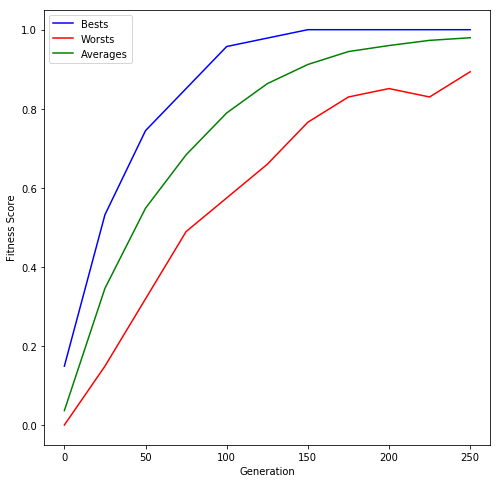

In [44]:
plt.figure(figsize=(8,8))

plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(best_scores)/len(real_sentence),'blue',label='Bests')
plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(worst_scores)/len(real_sentence),'red',label='Worsts')
plt.plot(np.arange(0,n_generations*11/10,n_generations/10),np.array(avg_scores)/len(real_sentence),'green',label="Averages")

plt.legend()
plt.xlabel('Generation')
plt.ylabel('Fitness Score')

plt.show()

## All fitness scores of all sentences over generations

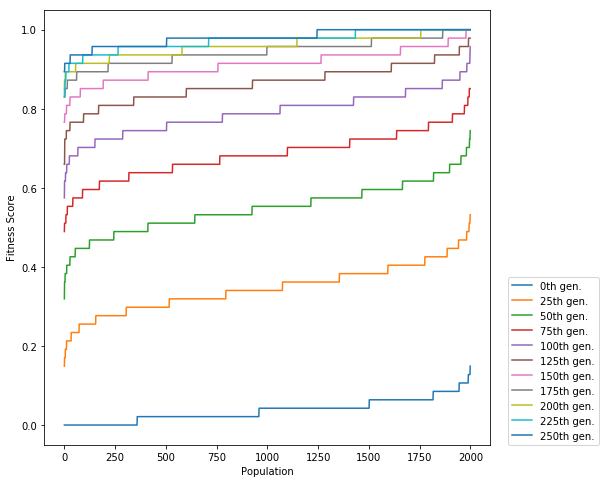

In [45]:
plt.figure(figsize=(8,8))

for ind,elem in enumerate(all_scores):
    inc = np.array(sorted(elem))/len(real_sentence)
    plt.plot(np.arange(N),inc,label=str(int(ind*n_generations/10))+'th gen.')

plt.legend(loc=(1.04,0))
plt.xlabel('Population')
plt.ylabel('Fitness Score')

plt.show()

## Cost is O(L\*G\*P)
- L: lenght of sentence
- G: generation number
- P: population size

In [46]:
print(len(real_sentence)*n_generations*N/1000000,'million')

23.5 million
